In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


In [2]:
data = pd.read_csv('car_offers_cleaned.csv', header=0, sep=';')
print(data)


                id offer_creation_date  \
0       6106252111    20.04.2023 14:52   
1       6103725874    21.04.2023 06:44   
2       6109470482    15.04.2023 14:38   
3       6108732545    13.04.2023 16:11   
4       6108048263    17.04.2023 15:15   
...            ...                 ...   
201781  6109273843    22.04.2023 17:15   
201782  6109658644    20.04.2023 21:35   
201783  6107624167    14.04.2023 16:53   
201784  6109013940    13.04.2023 20:00   
201785  6104364777    19.04.2023 10:47   

                                              offer_title   price  \
0                                               Volvo V70   23200   
1                                Honda Accord 2.0 Comfort   16800   
2               Mercedes-Benz Klasa X 350 d 4-Matic Power  249900   
3                            Toyota Avensis 1.8 VVT-i Sol   16499   
4                   Ford C-MAX 2.0 TDCi Champions Edition   29900   
...                                                   ...     ...   
201781      

In [3]:
data = data.replace('PRAWDA', 1)
data["fuel_consumption_in_city"] = data["fuel_consumption_in_city"].astype(str).str.replace(",", ".").astype(float)
data['car_age'] = 2023 - data['production_year']

data = data.drop(['production_year'], axis=1)

C:\Users\mszul\AppData\Local\Temp\ipykernel_8428\75427321.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace('PRAWDA', 1)


In [4]:
from sklearn.preprocessing import StandardScaler


features = [
    'car_age', 'mileage', 'engine_displacement', 'fuel_type', 'power', 'voivodeship', 'offer_from', 'vehicle_brand', 'fuel_consumption_in_city',
    'transmission', 'body_type', 'color', 'state'
]

features_2 = [
    'car_age', 'mileage', 'engine_displacement', 'power', 'fuel_type', 'vehicle_brand'
]

target = 'price'

data = data[features + [target]]
data_2 = data[features_2 + [target]]
data = data.dropna()
data_2 = data_2.dropna()



In [5]:
from sklearn.model_selection import train_test_split

numeric_features = ['car_age', 'mileage', 'engine_displacement', 'power', 'fuel_consumption_in_city']
categorical_features = ['fuel_type', 'voivodeship', 'offer_from', 'vehicle_brand', 'transmission', 'body_type', 'color', 'state']

numeric_features_2 = ['car_age', 'mileage', 'engine_displacement', 'power']
categorical_features_2 = ['fuel_type', 'vehicle_brand']

scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])
data_2[numeric_features_2] = scaler.fit_transform(data_2[numeric_features_2])


encoder = OneHotEncoder(drop="first", sparse_output=False)
encoder2 = OneHotEncoder(drop="first", sparse_output=False)



encoded_categorical = encoder.fit_transform(data[categorical_features])
encoded_categorical_2 = encoder2.fit_transform(data_2[categorical_features_2])

encoded_categorical_df = pd.DataFrame(
    encoded_categorical, 
    columns=encoder.get_feature_names_out(categorical_features),
    index=data.index
)

encoded_categorical_df_2 = pd.DataFrame(
    encoded_categorical_2, 
    columns=encoder2.get_feature_names_out(categorical_features_2),
    index=data_2.index
)


X = pd.concat([data[numeric_features], encoded_categorical_df], axis=1)
y = data[target]

X2 = pd.concat([data_2[numeric_features_2], encoded_categorical_df_2], axis=1)
y2 = data_2[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)






Pierwszy zestaw cech: 
MAE:  10625.73645105967
MSE:  734614717.4248725
R2:  0.9097206038523123


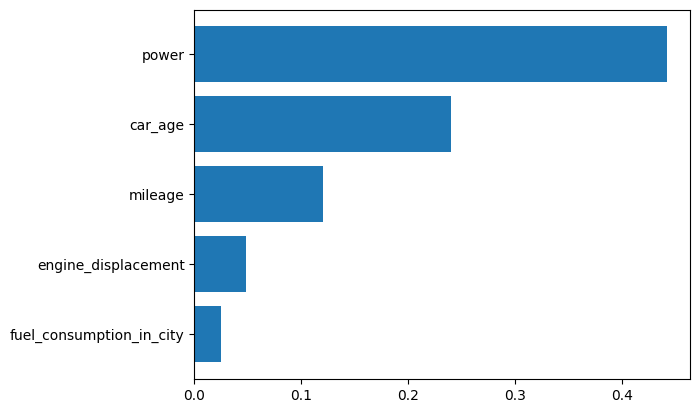

In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor


model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

# Ocena modelu
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Pierwszy zestaw cech: ")
print("MAE: ", mae)
print("MSE: ", mse)
print("R2: ", r2)


import matplotlib.pyplot as plt

importances = model.feature_importances_
feature_names = X.columns
sorted_idx = importances.argsort()

top_5_idx = sorted_idx[-5:]

plt.barh(feature_names[top_5_idx], importances[top_5_idx])
plt.show()


Drugi zestaw cech: 
MAE:  14416.567448071864
MSE:  1529891959.5794032
R2:  0.8698721109899313


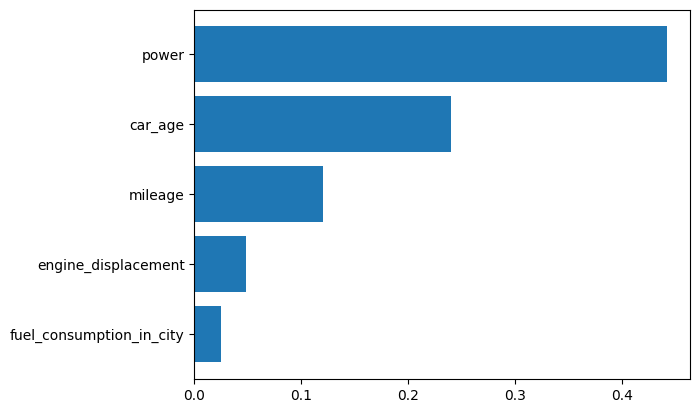

In [7]:
model2 = RandomForestRegressor(random_state=42)
model2.fit(X_train2, y_train2)

y_pred2 = model2.predict(X_test2)


mae2 = mean_absolute_error(y_test2, y_pred2)
mse2 = mean_squared_error(y_test2, y_pred2)
r2_2 = r2_score(y_test2, y_pred2)

print("Drugi zestaw cech: ")
print("MAE: ", mae2)
print("MSE: ", mse2)
print("R2: ", r2_2)


importances = model.feature_importances_
feature_names = X.columns
sorted_idx = importances.argsort()

top_5_idx = sorted_idx[-5:]

plt.barh(feature_names[top_5_idx], importances[top_5_idx])
plt.show()

In [8]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE: ", mae)
print("MSE: ", mse)
print("R2: ", r2)


MAE:  14746.011329615912
MSE:  1457229556.5169804
R2:  0.8209159151179546


In [9]:
from sklearn.tree import DecisionTreeRegressor

model2 = DecisionTreeRegressor(random_state=42)
model2.fit(X_train2, y_train2)

y_pred2 = model2.predict(X_test2)

mae = mean_absolute_error(y_test2, y_pred2)
mse = mean_squared_error(y_test2, y_pred2)
r2 = r2_score(y_test2, y_pred2)

print("MAE: ", mae)
print("MSE: ", mse)
print("R2: ", r2)

MAE:  17823.633388782797
MSE:  2505331803.6415806
R2:  0.7869042079498907


In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Ocena modelu 
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE: ", mae)
print("MSE: ", mse)
print("R2: ", r2)

MAE:  25679.594642803677
MSE:  2627346579.709963
R2:  0.677116103093639


In [11]:
from sklearn.linear_model import LinearRegression

model2 = LinearRegression()
model2.fit(X_train2, y_train2)

y_pred2 = model2.predict(X_test2)

# Ocena modelu 
mae = mean_absolute_error(y_test2, y_pred2)
mse = mean_squared_error(y_test2, y_pred2)
r2 = r2_score(y_test2, y_pred2)

print("MAE: ", mae)
print("MSE: ", mse)
print("R2: ", r2)

MAE:  33322.917245306104
MSE:  4028970676.5263305
R2:  0.6573081871977583


In [13]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow.keras.backend as K

def r2_score(y_true, y_pred):
    y_true = K.cast(y_true, dtype='float32')
    ss_res = K.sum(K.square(y_true - y_pred))
    ss_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - ss_res / (ss_tot + K.epsilon()) 

print(X_train.shape)
input_shape = (122,)
model = keras.Sequential(
    [       
        keras.Input(shape=input_shape),
        layers.Dense(1024, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(units=1)
    ]
)

model.summary()

model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mean_squared_error','mean_absolute_error', r2_score], )
model.fit(X_train, y_train, batch_size = 32, epochs = 20, validation_split=0.2)

metrics = model.evaluate(X_test, y_test)

print("MAE:", metrics[2])
print("MSE:", metrics[1])
print("R2:", metrics[3])
      


(93969, 122)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 1024)           │       125,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 782,337 (2.98 MB)

 Trainable params: 782,337 (2.98 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
2350/2350 ━━━━━━━━━━━━━━━━━━━━ 25s 10ms/step - loss: 4163204352.0000 - mean_absolute_error: 26596.1543 - mean_squared_error: 4163204352.0000 - r2_score: 0.4600 - val_loss: 3130380544.0000 - val_mean_absolute_error: 15189.8213 - val_mean_squared_error: 3130380544.0000 - val_r2_score: 0.7727
Epoch 2/20
2350/2350 ━━━━━━━━━━━━━━━━━━━━ 23s 10ms/step - loss: 1795163008.0000 - mean_absolute_error: 15128.3174 - mean_squared_error: 1795163008.0000 - r2_score: 0.7730 - val_loss: 2958135808.0000 - val_mean_absolute_error: 13743.4863 - val_mean_squared_error: 2958135808.0000 - val_r2_score: 0.8353
Epoch 3/20
2350/2350 ━━━━━━━━━━━━━━━━━━━━ 23s 10ms/step - loss: 2088796032.0000 - mean_absolute_error: 15234.8994 - mean_squared_error: 2088796032.0000 - r2_score: 0.7365 - val_loss: 2763189760.0000 - val_mean_absolute_error: 13579.8398 - val_mean_squared_error: 2763189760.0000 - val_r2_score: 0.8204
Epoch 4/20
2350/2350 ━━━━━━━━━━━━━━━━━━━━ 24s 10ms/step - loss: 1643159168.0000 - mean_absolut

In [15]:
print(X_train2.shape)
input_shape = (109,)
model2 = keras.Sequential(
    [       
        keras.Input(shape=input_shape),
        layers.Dense(1024, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(units=1)
    ]
)

model2.summary()

model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mean_squared_error','mean_absolute_error', r2_score])

model2.fit(X_train2, y_train2, batch_size = 32, epochs = 20, validation_split=0.2)

metrics = model2.evaluate(X_test2, y_test2)

print("MAE:", metrics[2])
print("MSE:", metrics[1])
print("R2:", metrics[3])



(157856, 109)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 1024)           │       112,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 769,025 (2.93 MB)

 Trainable params: 769,025 (2.93 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
3947/3947 ━━━━━━━━━━━━━━━━━━━━ 56s 14ms/step - loss: 5471126016.0000 - mean_absolute_error: 30626.2656 - mean_squared_error: 5471126016.0000 - r2_score: 0.5429 - val_loss: 1852750208.0000 - val_mean_absolute_error: 18117.7266 - val_mean_squared_error: 1852750208.0000 - val_r2_score: 0.8215
Epoch 2/20
3947/3947 ━━━━━━━━━━━━━━━━━━━━ 50s 13ms/step - loss: 2246087680.0000 - mean_absolute_error: 19075.2227 - mean_squared_error: 2246087680.0000 - r2_score: 0.7972 - val_loss: 1765020416.0000 - val_mean_absolute_error: 17738.1523 - val_mean_squared_error: 1765020416.0000 - val_r2_score: 0.8356
Epoch 3/20
3947/3947 ━━━━━━━━━━━━━━━━━━━━ 52s 13ms/step - loss: 2376253696.0000 - mean_absolute_error: 18871.7363 - mean_squared_error: 2376253696.0000 - r2_score: 0.8011 - val_loss: 1643505792.0000 - val_mean_absolute_error: 17130.9258 - val_mean_squared_error: 1643505792.0000 - val_r2_score: 0.8306
Epoch 4/20
3947/3947 ━━━━━━━━━━━━━━━━━━━━ 52s 13ms/step - loss: 2756740096.0000 - mean_absolut